**Kατεβάστε το seeds Dataset από τη διεύθυνση https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt .**

**Το αρχείο περιέχει μορφολογικές μετρήσεις 210 σπόρων από τρεις ποικιλίες σιτηρών (ω1: Kama, ω2: Rosa, ω3: Canadian). Οι πρώτες 7 στήλες περιέχουν τις μετρηθείσες τιμές των μορφολογικών χαρακτηριστικών και η τελευταία στήλη περιλαμβάνει την ετικέτα της ποικιλίας στην οποία ανήκει κάθε σπόρος.**

Προκειμένου να μην χρειάζεται κάθε φορά να φορτώνω χειροκίνητα το αρχείο που περιέχει τα δεδομένα, συνδέω το google colab με τον λογαριασμό μου στο google drive μέσω της βιβλιοθήκης google.colab. Με την εντολή mount φορτώνονται τα περιεχόμενα του Drive μου. Έπειτα, προσδιορίζω την διεύθυνση του αρχείου seeds_dataset.txt, το οποίο και διαβάζω με την βιβλιοθήκη numpy, ώστε να το αντιμετωπίζω σαν πίνακα, ο οποίος περιέχει δεδομένα τύπου float.

Εάν δεν θέλω να συνδεθώ στο Drive, αλλά να φορτώσω χειροκίνητα το αρχείο seeds_dataset.txt, χρησιμοποιώ την τελευταία εντολή του κελιού.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Πρέπει να αλλάξει ανάλογα με την θέση του αρχείου Data_ex1 στο Google Drive
# Διαφορετικά να βγει από σχόλιο η τελευταία γραμμή του κελιού
path_to_data = '/content/gdrive/MyDrive/Colab Notebooks/Pattern Recognition/HW 03/seeds_dataset.txt'

import numpy as np
global file
file = np.loadtxt(path_to_data, dtype=float, encoding=None, delimiter="\t")

del path_to_data

# Εάν θέλουμε να ανεβάσουμε χειροκίνητα το αρχείο Data_ex1.txt
# file = np.loadtxt('seeds_dataset.txt', dtype=float, encoding=None, delimiter=",")

Mounted at /content/gdrive


Σημειώνω ότι το αρχείο txt δεν είναι ακριβώς αυτό που κατέβασα, αλλά έχει υποστεί κατάλληλη επεξεργασία ώστε όλες οι γραμμές να έχουν τον ίδιο αριθμό στηλών. Το επεξεργασμένο αυτό αρχείο παρατίθεται μαζί με τον κώδικα.

Διαχωρίζω τα περιεχόμενα του αρχείου σύμφωνα με την εκφώνηση σε δεδομένα και σε ετικέτες ξεχωριστών πινάκων.

In [ ]:
data   = file[:, :-1]
labels = file[:, -1]
del file

# **ΕΡΩΤΗΜΑ Α**

**Απεικονίστε τον πίνακα αποστάσεων των δεδομένων για Ευκλείδεια και cosine μετρικές. Ποιες κλάσεις πιστεύετε ότι είναι ευκολότερο να διαχωριστούν μεταξύ
τους; Γιατί;**

In [ ]:
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import seaborn as sns

def distance_matrix(metric):
    if metric == "euclidean":
        distance_matrix = cdist(data, data, metric='euclidean')
    elif metric == "cosine":
        distance_matrix = cdist(data, data, metric='cosine')
    else:
        print("Unkown metric. Possible metrics: 'euclidean' or 'cosine'")
        return
    plt.figure()
    sns.heatmap(distance_matrix, cmap="viridis")
    plt.title("Πίνακας αποστάσεων με μετρική "+str(metric))
    plt.xlabel("Index Δείγματος")
    plt.ylabel("Index Δείγματος")

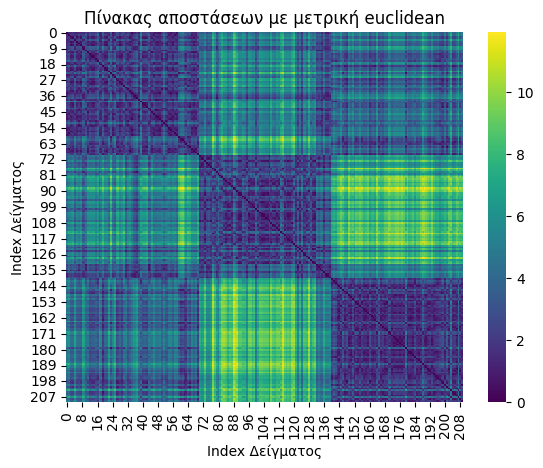

In [ ]:
distance_matrix("euclidean")

Η διαγώνιος με το σκούρο μπλε δηλώνει ότι το κάθε δείγμα είναι πάρα πολύ κοντά με τον εαυτό του, όπως και αναμενόταν. Όσο πιο φωτεινό είναι το τετράγωνο τόσο μεγαλύτερη είναι η απόσταση μεταξύ των δύο δειγμάτων. Για την πρώτη κλάση (πρώτα 70 δείγματα) παρατηρώ σχεδόν μηδενική απόσταση μεταξύ των δειγμάτων της αλλά παρόμοιες αποστάσεις για τα δείγματα των κλάσεων 2 και 3. Η κλάση 2 (επόμενα 70 δείγματα) σημειώνει σχεδόν μηδενική απόσταση μεταξύ των δειγμάτων της, μέτρια με τα δείγματα της κλάσης 1 και μεγάλη με τα δείγματα της κλάσης 3. Η κλάση 3 (τελευταία 70 δείγματα) σημειώνει σχεδόν μηδενική απόσταση μεταξύ των δειγμάτων της, μικρή για τα δείγματα της κλάσης 1 και μεγάλη για τα δείγματα της κλάσης 2. Συνεπώς, οι κλάσεις 2 και 3 είναι εύκολα διαχωρίσιμες.

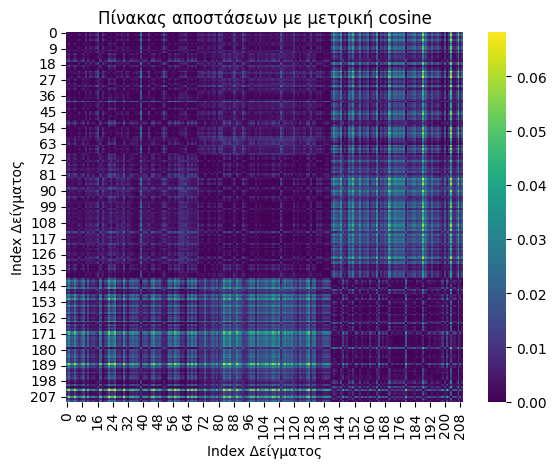

In [ ]:
distance_matrix("cosine")

Όπως και προηγουμένως, όσο πιο σκούρο το χρώμα ενός τετραγώνου τόσο πιο κοντά βρίσκονται τα δύο δείγματα. Οι αποστάσεις των δειγμάτων της κλάσης 1 είναι μικρές τόσο για τα ίδια τα δεδομένα της κλάσης όσο και για εκείνα της κλάσης 2. Αντίθετα, η απόστασή τους από τα δεδομένα της κλάσης 3 είναι αισθητά μεγαλύτερη. Ομοίως για την κλάση 3. Συνεπώς, για αυτήν την περίπτωση, μονάχα η κλάση 3 είναι εύκολα διαχωρίσιμη.

# **ΕΡΩΤΗΜΑ Β**

**Να υπολογίσετε το Silhouette Coefficient για την ομαδοποίηση των 7-διάστατων δεδομένων σε k=2,3,..10 κλάσεις με τη μέθοδο k-means και Ευκλείδεια ή squared Euclidean μετρική.**

**Απεικονίστε το διάγραμμα του Silhouette και σχολιάστε ποιος
είναι ο βέλτιστος αριθμός κλάσεων σύμφωνα με το κριτήριο αυτό.**

Ένας δείκτης προκειμένου να αξιολογήσουμε έναν αλγόριθμο ομαδοποίησης είναι ο Silhoute Coefficient. Ο δείκτης αυτός συγκρίνει το πόσο κοντά είναι τα δεδομένα μέσα στην εκάστοτε ομάδα σε σχέση με τις υπόλοιπες. Παίρνει τιμές από -1 μέχρι 1: όσο μεγαλύτερη η τιμή τόσο καλύτερη η ομαδοποίηση.


Η παράμετρος n_init καθορίζει τον αριθμό των φορών που η διαδικασία των k-means θα εκτελεστεί με διαφορετική αρχικοποίηση των κέντρων των clusters. Αυτό γίνεται διότι ο αλγόριθμος k-means είναι ευαίσθητος στην αρχική θέση των κέντρων. Για n_init=1, ο αλγόριθμος θα εκτελεστεί μόνο μία φορά με μια τυχαία αρχικοποίηση των κέντρων των συστάδων.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def calculate_silhouette_coefficient(data, metric):
    k_clusters = range(2, 11) # εύρος για k-means

    silhouette_scores = []

    for k in k_clusters:
        kmeans = KMeans(n_clusters=k, n_init=1, random_state=0).fit(data)
        cluster_labels = kmeans.fit_predict(data)

        # Calculate silhouette score
        silhouette = silhouette_score(data, cluster_labels, metric=metric)
        silhouette_scores.append(silhouette)

        print("K_clusters: ", k, " \tSilhouette_score: ", silhouette)

    max_index = np.argmax(silhouette_scores)+2
    print("\nΗ καλύτερη ομαδοποίηση γίνεται για ", max_index, " αριθμό clusters στον αλγόριθμο K-Means.\n")

    # Plotting the silhouette scores
    plt.figure()
    plt.plot(k_clusters, silhouette_scores, marker='o')
    if metric == 'euclidean':
        plt.title('Silhouette Coefficient for Different Numbers of Clusters with metric euclidean.')
    else:
        plt.title('Silhouette Coefficient for Different Numbers of Clusters with metric cosine.')


    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Coefficient')
    plt.xticks(k_clusters)
    plt.grid(True)
    plt.show()

K_clusters:  2  	Silhouette_score:  0.5182873410849105
K_clusters:  3  	Silhouette_score:  0.46813908008597
K_clusters:  4  	Silhouette_score:  0.3964645749573993
K_clusters:  5  	Silhouette_score:  0.34701549132535914
K_clusters:  6  	Silhouette_score:  0.3406864112755031
K_clusters:  7  	Silhouette_score:  0.3336234222909996
K_clusters:  8  	Silhouette_score:  0.3301115590148433
K_clusters:  9  	Silhouette_score:  0.3336529259600899
K_clusters:  10  	Silhouette_score:  0.3310069617178977

Η καλύτερη ομαδοποίηση γίνεται για  2  αριθμό clusters στον αλγόριθμο K-Means.



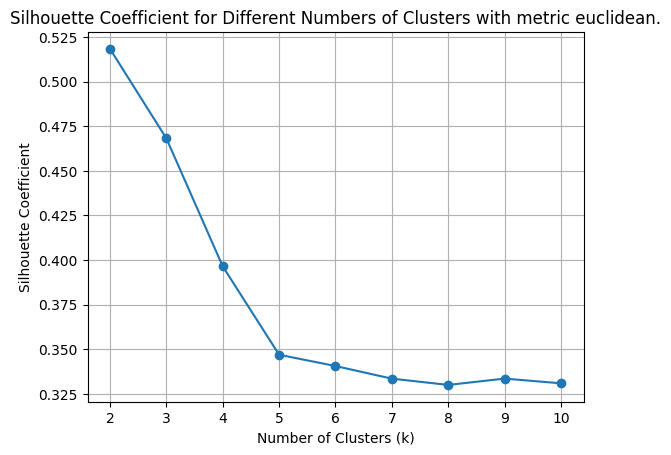

In [ ]:
calculate_silhouette_coefficient(data, 'euclidean')

# **ΕΡΩΤΗΜΑ Γ**

**Να κανονικοποιηθούν τα δεδομένα ώστε κάθε χαρακτηριστικό να έχει μηδενική τιμή και μοναδιαία variance.**

**Υπολογίσετε εκ νέου το Silhouette Coefficient στα κανονικοποιημένα δεδομένα για cosine μετρική. Απεικονίστε το νέο διάγραμμα του Silhouette. Τι παρατηρείτε?**

Με την κανονικοποίηση των χαρακτηριστικών επιδιώκω να έχουν μηδενική μέση τιμή και μοναδιαία διακύμανση. Για την υλοποίηση της κανονικοποίηση υιοθέτησα την μεθοδολογια που δειξατε στο εργαστήριο.


K_clusters:  2  	Silhouette_score:  0.6421239042064366
K_clusters:  3  	Silhouette_score:  0.5706593164959539
K_clusters:  4  	Silhouette_score:  0.45426421227961167
K_clusters:  5  	Silhouette_score:  0.3476996719993382
K_clusters:  6  	Silhouette_score:  0.27853705495495706
K_clusters:  7  	Silhouette_score:  0.280639251443571
K_clusters:  8  	Silhouette_score:  0.2882423565179566
K_clusters:  9  	Silhouette_score:  0.2962946017915685
K_clusters:  10  	Silhouette_score:  0.2918266078223928

Η καλύτερη ομαδοποίηση γίνεται για  2  αριθμό clusters στον αλγόριθμο K-Means.



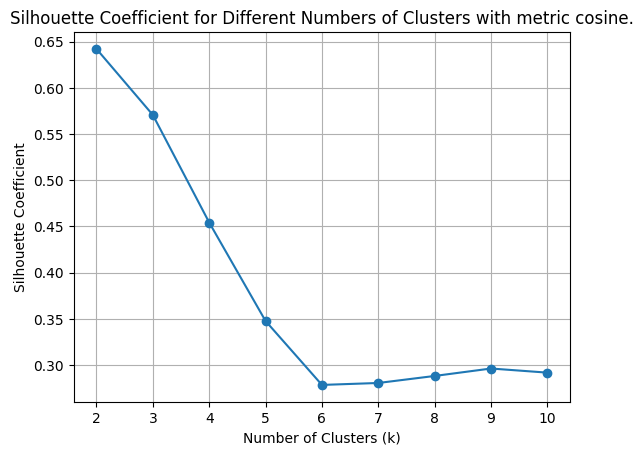

In [ ]:
from sklearn.preprocessing import StandardScaler

# Κανονικοποίηση δεδομένων ώστε κάθε χαρακτηριστικό να έχει μηδενική μέση τιμή και μοναδιαία διακύμανση
scaler = StandardScaler(with_mean=True, with_std=True)
data_normalized = scaler.fit_transform(data)

calculate_silhouette_coefficient(data_normalized, 'cosine')

Αν και στις δύο περιπτώσεις η βέλτιστη τιμή των clusters είναι 2, πράγμα που σημαίνει ότι οι δύο ομάδες αποτελούν την καλύτερη διαίρεση για το παρόν dataset
Στην δεύτερη περίπτωση βελτιώνεται σημαντικά η ομοιογένεια εντός των ομάδων καθιστώντας πιο εύκολο τον διαχωρισμό τους.

# **ΕΡΩΤΗΜΑ Δ**

**Ομαδοποιείστε τα δεδομένα σε 3 κλάσεις με τη μέθοδο k-means και squared
Euclidean μετρική. Υπολογίστε το Rand Index για τη σύγκριση της παραγόμενης
ομαδοποίησης με τις ετικέτες του dataset. Επαναλάβετε 5 φορές (με τυχαία
αρχικοποίηση κέντρων), και υπολογίστε την μέση τιμή και το variance του Rand
Index.**

Ο δείκτης Rand Index είναι ένα μέτρο αξιολόγησης της ομοιότητας των clusters. Κατά κύριο λόγο χρησιμοποιείται για να συγκρίνουμε το αποτέλεσμα της ομαδοποίσης διαφορετικών αλγόριθμων.

Οι υψηλές τιμές δηλώνουν ότι τα αποτελέσματα των δύο αλγορίθμων συμφωνούν σε μεγάλο βαθμό.

In [ ]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import rand_score

def calculate_rand_index(data, labels):
    rand_indices = []
    for i in range(5):
        kmeans = KMeans(n_clusters=3, n_init=1, init='random', random_state=i).fit(data)
        cluster_labels = kmeans.labels_
        # print("----", cluster_labels)
        # Υπολογισμός Rand Index
        rand_index = adjusted_rand_score(labels, cluster_labels)
        rand_indices.append(rand_index)

    # Υπολογισμός μέσης τιμής και διακύμανσης του Rand Index
    mean_rand_index = np.mean(rand_indices)
    variance_rand_index = np.var(rand_indices)

    print("Μέση τιμή Rand Index: ", mean_rand_index, "\tΔιακύμανση Rand Index:", variance_rand_index)


In [ ]:
print("-- Squared Euclideian metric")
calculate_rand_index(data, labels)

-- Squared Euclideian metric
Μέση τιμή Rand Index:  0.7153642264424888 	Διακύμανση Rand Index: 6.306419691952044e-06


# **ΕΡΩΤΗΜΑ Ε**

**Επαναλάβατε το ερώτημα Δ για cosine μετρική.**

*Σε περίπτωση που η βιβλιοθήκη που χρησιμοποιείτε δεν υποστηρίζει k-means με cosine μετρική,
μπορείτε να χρησιμοποιήσετε την προσέγγιση της κανονικοποίησης των διανυσμάτων σε μοναδιαίο
μήκος ακολουθούμενο από k-means με Ευκλείδεια μετρική.*

In [ ]:
# Κανονικοποίηση εργαστηρίου
length = np.sqrt((data_normalized**2).sum(axis=1))[:, None]
data_cosine = data_normalized / length

print("-- Cosine metric")
calculate_rand_index(data_cosine, labels)

-- Cosine metric
Μέση τιμή Rand Index:  0.6889693498587033 	Διακύμανση Rand Index: 0.0


**Ποια μετρική επιτυγχάνει ομαδοποίηση
πιο πιστή στις πραγματικές ομάδες των δεδομένων;**

Η απάντηση καθορίζεται από την μέση τιμή και την διακύμανση του rand index της κάθε υλοποίησης.

Η μέση τιμή προσδιορίζει την απόδοση του αλγορίθμου. Υψηλή τιμή δηλώνει ότι τα αποτελέσματα συνάδουν με τις πραγματικές ετικέτες των δεδομένων.

Η διακύμανση προσδιορίζει πόσο σταθερά είναι τα αποτελέσματα του αλγορίθμου. Υψηλή τιμή δηλώνει αστάθεια, δηλαδή τα αποτελέσματα διαφέρουν σημαντικά σε διαδοχικές εκτελέσεις.

Συνεπώς, ο ιδανικός συνδυασμός είναι υψηλή μέση τιμή και χαμηλή διακύμανση, προκειμένου ο αλγόριθμος να είναι ακριβής και αξιόπιστος.


Από τα παραπάνω είναι φανερό ότι η βέλτιστη υλοποίηση είναι η πρώτη καθώς έχει την μεγαλύτερη μέση τιμή και την μικρότερη διακύμανση του Rand Index.

# **BONUS**

**Έστω ότι σχεδιάζετε ένα σύστημα που χρειάζεται να εκτελεί ταξινόμηση με τη
μέθοδο Nearest Neighbor χρησιμοποιώντας ένα πολύ μεγάλο σύνολο δεδομένων
αναφοράς (εκπαίδευσης). Μπορείτε να σκεφτείτε έναν τρόπο να μειωθεί το υπολογιστικό κόστος κάθε νέας ταξινόμησης, αξιοποιώντας τεχνικές ομαδοποίησης? Περιγράψτε το
σκεπτικό σας και τα βήματα του αλγορίθμου.**

Η μέθοδος Nearest Neighbor (NN) αφορά την ταξινόμηση των δεδομένων με βάση στην κατηγορία την οποία ανήκουν οι πλησιέστεροι γείτονές του. Το πρόβλημα της μεθόδου αυτής είναι ότι ενδέχεται να γίνει εξαιρετικά απαιτητική υπολογιστικά για μεγάλα σύνολα δεδομένων.

Το κόστος αυτό οφείλεται στις συγκρίσεις του τρέχοντος δείγματος με κάθε δείγμα του συνόλου δεδομένων. Ένας τρόπος, λοιπόν, να μειώσουμε το υπολογιστικό κόστος είναι να προ-ομαδοποιήσουμε το μεγάλο σύνολο δεδομένων σε μικρότερα. Με άλλα λόγια, αντί να συγκρίνουμε το νέο δείγμα με όλο το μεγάλο σύνολο το συγκρίνουμε με εκπροσώπους του, τα κέντρα των ομάδων στις οποίες έχει διασπαστεί. Με αυτόν τον τρόπο περιορίζεται η αναζήτηση στην ομάδα που ενδέχεται να περιέχει το δείγμα.

**Βήματα Αλγορίθμου**

**1. Προεπεξεργασία (Ομαδοποίηση):**
Χρησιμοποιώ κάποια μέθοδο ομαδοποίησης, π.χ. k-means, για να χωρίσω το μεγάλο σύνολο δεδομένων σε μικρότερες ομάδες. Για κάθε ομάδα υπολογίζεται το κέντρο των δεδομένων.

**2. Εφαρμογή του Nearest Neighbor:**
Συγκρίνω κάθε νέο δείγμα με τα κέντρα που υπολόγισα προηγουμένως.

**3. Περιορισμένη Αναζήτηση:**
Για την ομάδα της οποίας το κέντρο είναι πιο κοντά στο νέο δείγμα συγκρίνω κάθε δείγμα της με το νέο ώστε να βρω αυτά που βρίσκονται πιο κοντά.

**4. Ταξινόμηση:**
Τελικά, το δείγμα ταξινομείται στην κλάση της οποίας η ετικέτα εμφανίζεται τις περισσότερες φορές στο πλήθος των κοντινότερων γειτόνων.

